Example code for "Sensitivity of collective outcomes identifies pivotal components" by Lee et al.

Author: Eddie Lee, edl56@cornell.edu

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/eddie/anaconda/envs/scotus/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['base_repr', 'unravel_index', 'multinomial']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [35]:
plt.rc('font',size=15)

In [90]:
import pyutils.pipeline as pipe
from pyutils.influence import *
from pyutils import mvm

from itertools import combinations
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from pyutils.blocs import BlocProjection

In [86]:
load_pickle('package/data.p')

['data']

# Calculate FIM.

In [87]:
curvatureResults = pipe.calculate_fisher_on_pk(data,
                                               fi_method='2',
                                               save=False,
                                               eps=1e-4)

Starting scotus 1607...
Imaginary components are significant.
There are negative eigenvalues.

Starting spdr bomm9...
Imaginary components are significant.
There are negative eigenvalues.

Starting state AK 4...
Imaginary components are significant.
There are negative eigenvalues.

Starting state NJ 4...


/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A 

/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A is badly conditioned.
  warn("A is badly conditioned.")
/home/eddie/Dropbox/Research/SCOTUS3/py/pyutils/fim.py:1522: UserWarning: A 

Imaginary components are significant.
There are negative eigenvalues.

Starting stateleg CAA9 99...
Imaginary components are significant.
There are negative eigenvalues.

Starting twitter kpop comm10...
Imaginary components are significant.
There are negative eigenvalues.



/home/eddie/anaconda/envs/scotus/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


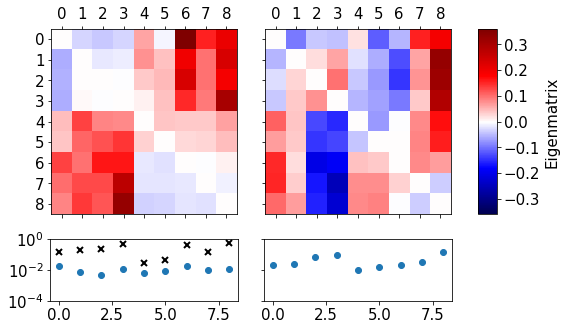

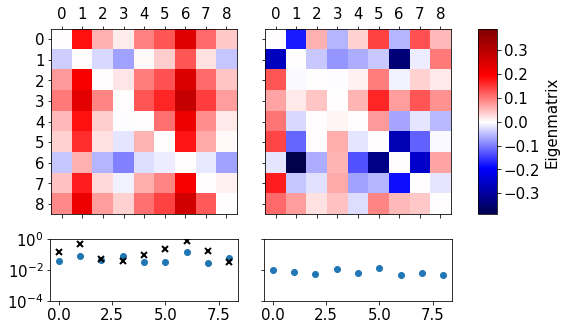

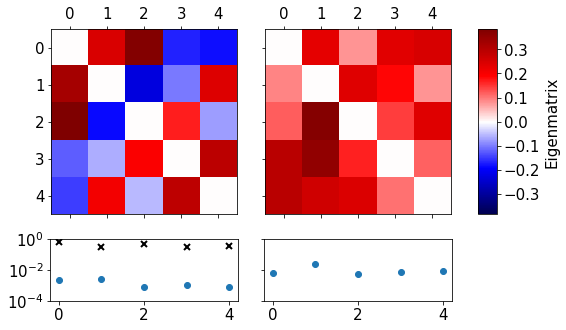

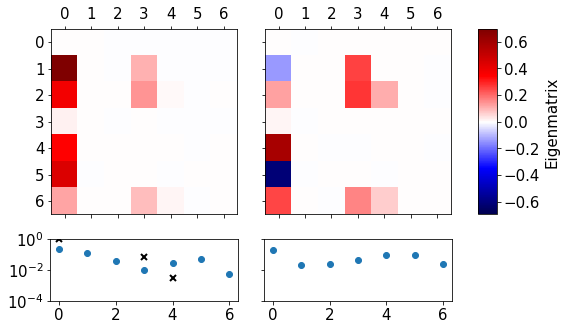

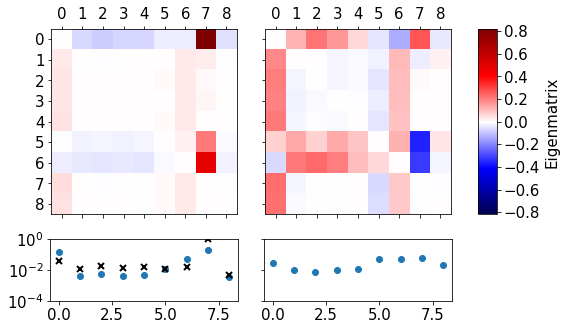

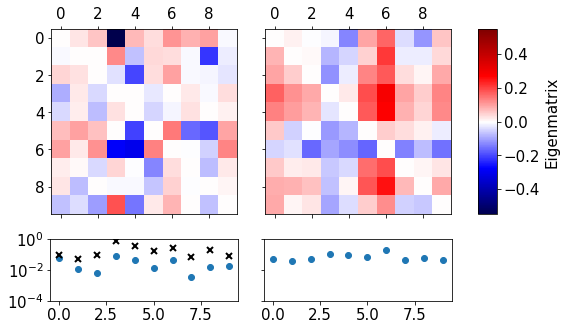

In [88]:
# Plot first two eigenmatrices, pivotal measure, and asymmetry.
for curv, (hess, errflag, errnorm), eigval, eigvec in curvatureResults.values():
    fig, ax = plt.subplots(figsize=(8,5), ncols=3, nrows=2, gridspec_kw={'height_ratios':(3,1),
                                                                          'width_ratios':(1,1,.1)})
    
    n = curv.n
    mx = abs(eigvec[:,:2]).max()
    ax[0,0].matshow(insert(eigvec[:,0], range(0,n*n,n), 0).reshape(n,n).T,
                    vmin=-mx, vmax=mx, cmap=plt.cm.seismic)
    cax = ax[0,1].matshow(insert(eigvec[:,1], range(0,n*n,n), 0).reshape(n,n).T,
                    vmin=-mx, vmax=mx, cmap=plt.cm.seismic)
    ax[0,1].set(yticklabels=[])
    
    asym = pair_asymmetry(eigvec, n, by_voter=True)
    ax[1,0].plot(asym, 'o')
    
    p = array([i[0] for i in block_subspace_eig(hess, n-1)[0]])
    p /= norm(p)
    ax[1,0].plot(p, 'kx', mew=2)
    ax[1,0].set(ylim=(1e-4,1.05), yscale='log')
    
    asym = pair_asymmetry(eigvec, n, by_voter=True, rank=1)
    ax[1,1].plot(asym, 'o')
    ax[1,1].set(ylim=(1e-4,1.05), yscale='log')
    ax[1,1].set(yticklabels=[])
    
    ax[1,2].set_visible(False)
    
    fig.colorbar(cax, cax=ax[0,2], label='Eigenmatrix')

# Project dissenting blocs (example of Second Rehnquist Court)

In [97]:
isingdkl, (hess, errflag, normerr), eigval, eigvec = curvatureResults['scotus 1607']
justices = [''.join([c for c in s if c.isupper()]) for s in data['scotus 1607'][0]]
justices = array([''.join([c[0],c[-1]]) for c in justices])

In [98]:
blocs = BlocProjection(isingdkl, eigvec, justices)

out = []
for k in range(1,5):
    out.append( blocs.dlogp(k) )
    
logp, dlogp, justiceSets = list(zip(*out))
sortix = [np.argsort(i) for i in dlogp]

In [112]:
def plot_breakdown(logp, dlogp, sortix, justiceSets, ax, color='k'):
    x = arange(9)

    sortix_ = argsort(logp)[-9:]
    ax[1].barh(range(9), logp[sortix_], color=color)
    ax[1].set(yticks=range(9), yticklabels=[],
              xlabel=r'$\log_{10} p_{\rm b}$',
              xlim=[-3,0], xticks=[-2,0])
    ax[1].yaxis.set_tick_params(length=0)
    
    y = dlogp[sortix_]
    ax[0].barh(x[y<0], y[y<0], color='C0')
    ax[0].barh(x[y>0], y[y>0], color='C3')
    ax[0].set(yticks=range(9))
    ax[0].set_xlabel('Rate of change\nin loglikelihood', fontsize='x-small')
    ax[0].set_yticklabels([justiceSets[i] for i in sortix_], fontsize=12);
    ax[0].set_xlim((-10,10))
    ax[0].yaxis.set_tick_params(length=0)
    ylim = ax[0].get_ylim()
    ax[0].vlines(0, *ylim, linewidth=.5)
    ax[0].set_ylim(ylim)
    
    ax[0].invert_xaxis()
    ax[1].invert_xaxis()

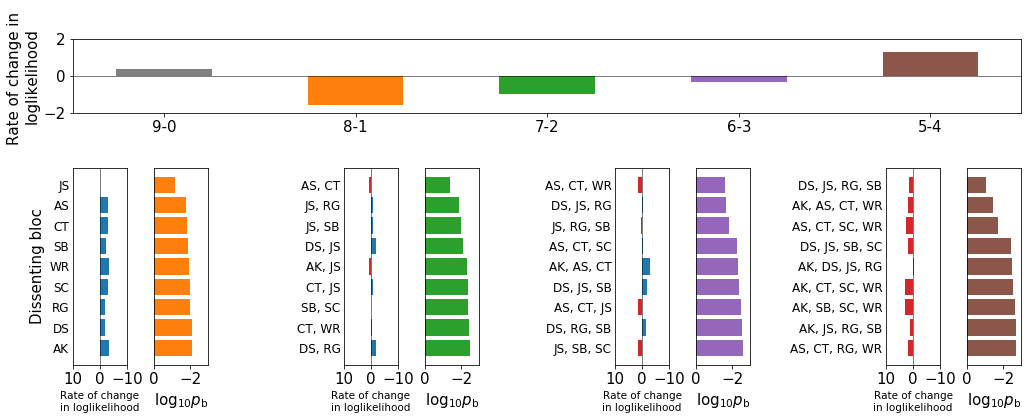

In [113]:
fig = plt.figure(figsize=(17,6))
gs = GridSpec(2, 4, height_ratios=(1.5,4), hspace=.4, wspace=1)

ax = fig.add_subplot(gs[0,:])
y = (log10(blocs.pkplusdE) - log10(blocs.pkminusdE))/(2*blocs.eps)
mx = abs(y).max()

# show overall change in majority-minority divisions
ax.bar(0, y[0], width=.5, color='gray')
for i in range(1,3):
    ax.bar(i, y[i], width=.5, color='C%d'%i)
for i in range(3,5):
    ax.bar(i, y[i], width=.5, color='C%d'%(i+1))
ax.set(xticks=range(5),
       xticklabels=['9-0','8-1','7-2','6-3','5-4'],
       ylabel='Rate of change in \nloglikelihood',
       ylim=(-2,2), yticks=(-2,0,2))
xlim = ax.get_xlim()
ax.hlines(0, *xlim, linewidth=.5)
ax.set(xlim=xlim)

# show details for...
# 8-1 split =======================================================
i = 0
gsSub = GridSpecFromSubplotSpec(1,2,gs[1,i],wspace=.5)
ax = [fig.add_subplot(gsSub[0]), fig.add_subplot(gsSub[1])]
plot_breakdown(logp[i], dlogp[i], sortix[i], justiceSets[i], ax, color='C%d'%(i+1))
ax[0].set(ylabel='Dissenting bloc')

# 7-2 split =======================================================
i = 1
gsSub = GridSpecFromSubplotSpec(1,2,gs[1,i],wspace=.5)
ax = [fig.add_subplot(gsSub[0]), fig.add_subplot(gsSub[1])]
plot_breakdown(logp[i], dlogp[i], sortix[i], justiceSets[i], ax, color='C%d'%(i+1))

# 6-3 split =======================================================
i = 2
gsSub = GridSpecFromSubplotSpec(1,2,gs[1,i],wspace=.5)
ax = [fig.add_subplot(gsSub[0]), fig.add_subplot(gsSub[1])]
plot_breakdown(logp[i], dlogp[i], sortix[i], justiceSets[i], ax, color='C%d'%(i+2))

# 5-4 split =======================================================
i = 3
gsSub = GridSpecFromSubplotSpec(1,2,gs[1,i],wspace=.5)
ax = [fig.add_subplot(gsSub[0]), fig.add_subplot(gsSub[1])]
plot_breakdown(logp[i], dlogp[i], sortix[i], justiceSets[i], ax, color='C%d'%(i+2))

# Median Voter Model

In [137]:
# MVM, N=7, q=1
n = 7

names = ['M']+['O']*6
smallfim, eigval, eigvec, pk = mvm.fim(n, epsdJ=1e-4)
fim = mvm.expand_small_fim(smallfim, n)

sisj_ = mvm.corr(n)
sisj = np.zeros(n*(n-1)//2)
sisj[:n-1] = sisj_[0]

J_ = mvm.couplings(n)
J = np.zeros(n*(n-1)//2)
J[:n-1] = J_[0]
J[n-1:] = J_[1]

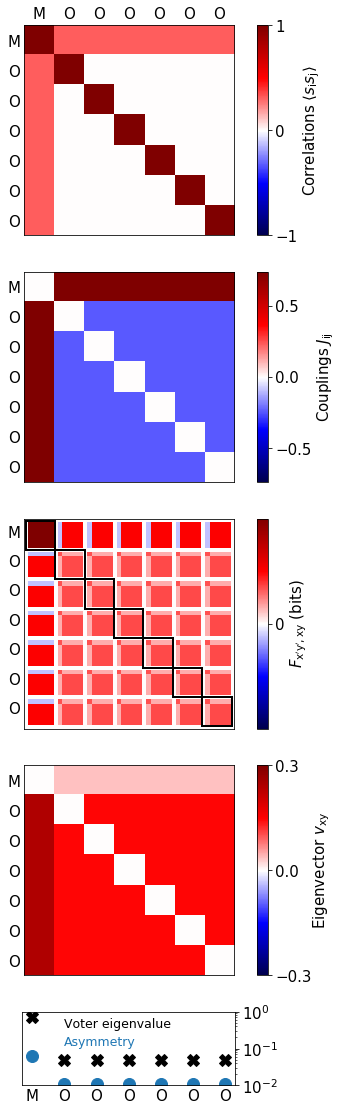

In [139]:
gs = GridSpec(5,2, height_ratios=(1,1,1,1,.35), width_ratios=(1,.05), hspace=.2, wspace=.2)
fig = plt.figure(figsize=(4.4,19.5))
ax = [fig.add_subplot(gs[i,0]) for i in range(4)]
ax.append( fig.add_subplot(gs[-1,0]) )

cmap = plt.cm.seismic
cmap.set_bad('#DEDEDE')
mat = squareform(sisj)
mat[diag_indices_from(mat)] = 1
cax = ax[0].matshow(mat, cmap=cmap, vmin=-1, vmax=1)
ax[0].set(xticks=range(n), yticks=range(n))
ax[0].set_xticklabels(names)
ax[0].set_yticklabels(names)
ax[0].xaxis.set_tick_params(length=0)
ax[0].yaxis.set_tick_params(length=0)

cbarax = fig.add_subplot(gs[0,1])
fig.colorbar(cax,
             cax=cbarax,
             label=r'Correlations $\langle s_{\rm i}s_{\rm j}\rangle$',
             ticks=[-1,0,1])

# Couplings ==================================
mx = abs(J).max()
cax = ax[1].imshow(squareform(J),
                   cmap=plt.cm.seismic, vmin=-mx, vmax=mx, aspect='equal')
ax[1].set(xticks=range(n), yticks=range(n),
          xticklabels=[])
ax[1].set_yticklabels(names)
ax[1].xaxis.set_ticks_position('top')
ax[1].tick_params(top=False, left=False, length=0)
ax[1].xaxis.set_tick_params(pad=8)

cbarax = fig.add_subplot(gs[1,1])
fig.colorbar(cax, cax=cbarax, label=r'Couplings $J_{\rm ij}$', ticks=[-.5,0,.5])

# ===============================
X = fim
X = insert(X, range(0,n*(n-1),n-1), zeros(n*(n-1)), axis=0)
X = insert(X, range(0,n*(n-1),n-1), zeros((X.shape[0],1)), axis=1)
X = append(X, zeros((X.shape[0],1)), axis=1)
X = append(X, zeros((1,X.shape[1])), axis=0)

mx = abs(hess).max()
cax = ax[2].imshow(X, cmap=plt.cm.seismic, vmin=-mx, vmax=mx)
ax[2].plot([0,n],[0,0], 'k-', lw=2)
ax[2].plot([0,0],[0,n],'k-', lw=2)
i = 0
ax[2].plot([i*n,(i+2)*n], [(i+1)*n,(i+1)*n], 'k-', lw=2)
ax[2].plot([(i+1)*n,(i+1)*n], [i*n,(i+2)*n], 'k-', lw=2)
for i in range(1,n-2):
    ax[2].plot([i*n,(i+2)*n],[(i+1)*n,(i+1)*n], 'k-', lw=2)
    ax[2].plot([(i+1)*n,(i+1)*n], [i*n,(i+2)*n], 'k-', lw=2)
i += 1
ax[2].plot([i*n,(i+2)*n],[(i+1)*n,(i+1)*n], 'k-', lw=2)
ax[2].plot([(i+1)*n,(i+1)*n], [i*n,(i+2)*n], 'k-', lw=2)
ax[2].plot([n*n-n,n*n],[n*n,n*n], 'k-', lw=2)
ax[2].plot([n*n,n*n],[n*n-n,n*n],'k-', lw=2)

ax[2].set(xticks=arange(2.5,(n+1)*(n-1),n), yticks=arange(2.5,(n+1)*(n-1),n),
          xticklabels=[])
ax[2].set_yticklabels(names)
ax[2].tick_params(top=False, left=False, length=0)
ax[2].xaxis.set_tick_params(pad=8)
ax[2].xaxis.set_ticks_position('top')

cbarax = fig.add_subplot(gs[2,1])
cbar = fig.colorbar(cax, cax=cbarax, label=r"$F_{\rm x'y',xy}$ (bits)",
                    ticks=[-1,0,1])

# eigenvector =================================
vec = eigvec[:,0]
vec = insert(vec, range(0,n*n,n), zeros(n)).reshape(n,n)
mx = .3
cax = ax[3].imshow(-vec.T, cmap=plt.cm.seismic, vmin=-mx, vmax=mx)
ax[3].set(xticks=range(n), yticks=range(n),
          xticklabels=[], yticklabels=names)

ax[3].xaxis.set_tick_params(length=0)
ax[3].xaxis.set_ticks_position('top')
ax[3].yaxis.set_tick_params(length=0)

cbarax = fig.add_subplot(gs[3,1])
cbar = fig.colorbar(cax, cax=cbarax, 
                    ticks=[-.3,0,.3])
cbar.ax.set_ylabel(r"Eigenvector $v_{\rm xy}$", labelpad=0)

# Voter asymmetry ==================================
ax[4].semilogy(range(n), pair_asymmetry(eigvec,7,by_voter=True), 'o', ms=12, zorder=0)
blockeigval = np.array([i[0] for i in block_subspace_eig(fim,n-1)[0]])
ax[4].semilogy(range(n), blockeigval**2/(blockeigval**2).sum(), 'kX', ms=12, zorder=1)
ax[4].text(1,.12,'Asymmetry',fontsize='small', color='C0')
ax[4].text(1,.37,'Voter eigenvalue',fontsize='small')
ax[4].set(xticks=range(n), ylim=(1e-2,1), xlim=(-.3,n-.7))
ax[4].yaxis.set_ticks_position('right')
ax[4].yaxis.set_label_position('right')
ax[4].set_xticklabels(names)
ax[4].xaxis.set_tick_params(length=0)